<a href="https://colab.research.google.com/github/vadim-privalov/Neiroset_Novosibirsk/blob/main/%D0%90%D0%B2%D1%82%D0%BE%D0%BC%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D0%BE%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BA%D1%80%D0%B0%D0%B5%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Автоматическое определение краев

# Automatic edge detection


В этом уроке мы научимся автоматически определять края объектов на изображении


In this lesson we will learn how to automatically detect the edges of objects in an image


Поговорим чуть подробнее об функции **Canny()**

**Алгоритм обнаружения краев Canny можно разбить на 5 шагов:**


Let's talk a little more about the **Canny()** function

**The Canny's edge detection algorithm can be broken down into 5 steps:**


Шаг 1: Сглаживание изображения с помощью фильтра Гаусса для удаления высокочастотного шума. Step 1: Smoothing the image using a Gaussian filter to remove high frequency noise.

Шаг 2: Вычисление представления интенсивности градиента изображения. Step 2: Calculating the image gradient intensity representation.

Шаг 3: Применение не максимального подавления для удаления "ложных" ответов на обнаружение краев. Step 3: Applying no maximum suppression to remove "false" edge detection responses.

Шаг 4: Применение пороговуй обработиу, используя нижнюю и верхнюю границы для значений градиента. Step 4: Apply thresholding using lower and upper bounds for gradient values.

Шаг 5: Отслеживание краев путем подавления слабых краев, не связанных с сильными краями.
Step 5: Trace edges by suppressing weak edges not related to strong edges.

Мы ее использовали и в предыдущем уроке, однако все параметры мы указывали вручную. В этом же уроке мы будет определять порог автоматически с помощью  функции auto_canny().

Автоматический метод позволяет найти только самые ключевые контуры, удалив при этом многие края фона. 



We used it in the previous lesson as well, but we specified all parameters manually. In this tutorial we will define the threshold automatically using the auto_canny() function.

The automatic method allows you to find only the most key contours, while removing many of the background edges. 

In [1]:
!wget http://dataudt.ru/datasets/cv/Lesson_24.Edge_detection_auto.zip
!unzip Lesson_24.Edge_detection_auto.zip
%cd /content/Lesson_24.Edge_detection_auto

--2022-02-01 18:57:12--  http://dataudt.ru/datasets/cv/Lesson_24.Edge_detection_auto.zip
Resolving dataudt.ru (dataudt.ru)... 37.228.117.130
Connecting to dataudt.ru (dataudt.ru)|37.228.117.130|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1221991 (1.2M) [application/zip]
Saving to: ‘Lesson_24.Edge_detection_auto.zip’

Lesson_24.Edge_dete 100%[===================>]   1.17M  1.58MB/s    in 0.7s    

2022-02-01 18:57:13 (1.58 MB/s) - ‘Lesson_24.Edge_detection_auto.zip’ saved [1221991/1221991]

Archive:  Lesson_24.Edge_detection_auto.zip
  inflating: Lesson_24.Edge_detection_auto/Auto_edge.py  
  inflating: Lesson_24.Edge_detection_auto/object_01.png  
  inflating: Lesson_24.Edge_detection_auto/object_02.png  
  inflating: Lesson_24.Edge_detection_auto/object_03.png  
  inflating: Lesson_24.Edge_detection_auto/object_04.png  
  inflating: Lesson_24.Edge_detection_auto/pill_03.png  
/content/Lesson_24.Edge_detection_auto


In [2]:
# импортируем необходимые модули
# import the necessary packages
import imutils
import cv2
from google.colab.patches import cv2_imshow

In [3]:
#  создаем отдельный словарь с аргументами 
# create a separate dictionary with arguments
args = {
   # путь к входному изображению 
   # path to input image
  "image" : "object_02.png" 
}

Original


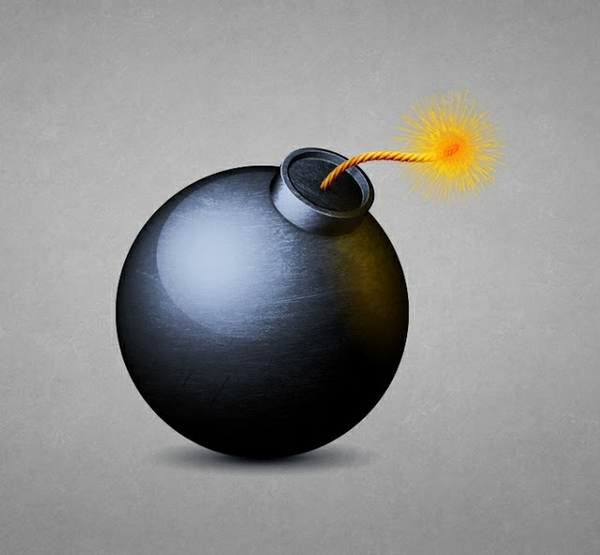

Wide


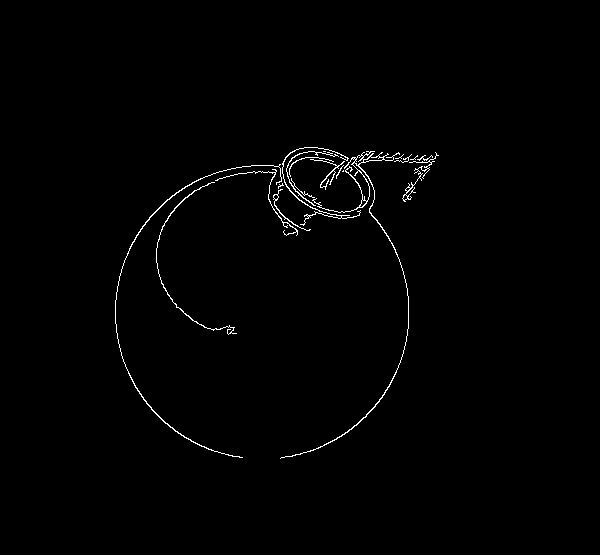

Tight


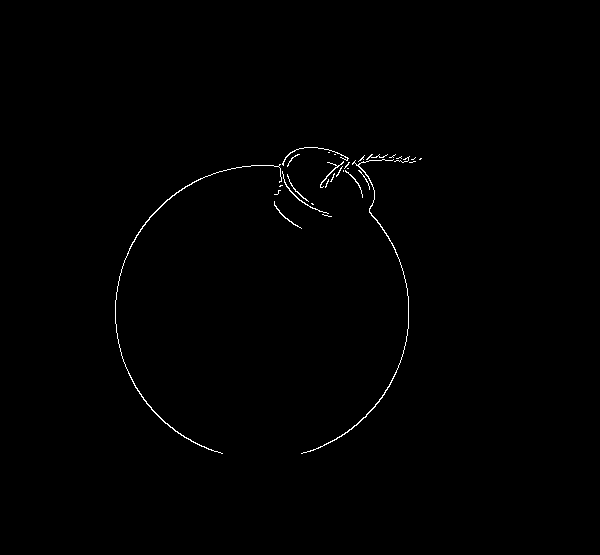

Auto


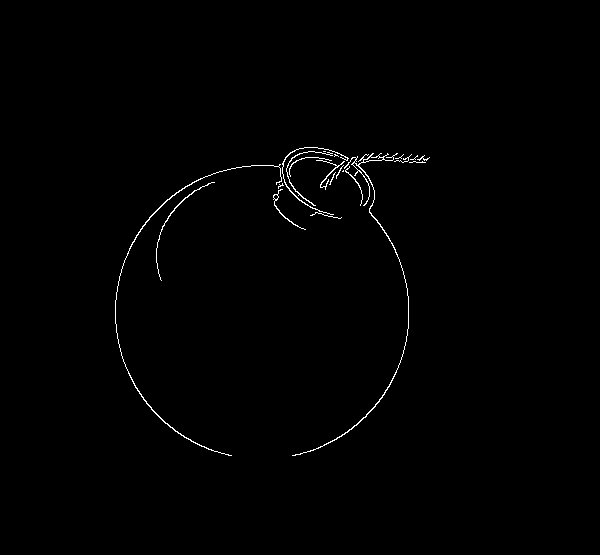

In [4]:
# загружаем изображение, конвертируем его 
# в градации серого и слегка размываем
# load the image, convert it to grayscale, and blur it slightly
image = cv2.imread(args["image"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (3, 3), 0)

# применим алгоритм обнаружение края Canny, 
# используя широкий порог, жесткий порог 
# и автоматически определяемый порог
# apply Canny edge detection using a wide threshold, tight
# threshold, and automatically determined threshold
wide = cv2.Canny(blurred, 10, 200)
tight = cv2.Canny(blurred, 225, 250)
auto = imutils.auto_canny(blurred)

# отобразим изображения
# show the images
print("Original") 
cv2_imshow(image)

print("Wide") 
cv2_imshow(wide)

print("Tight") 
cv2_imshow(tight)

print("Auto") 
cv2_imshow(auto)